In [58]:
import pandas as pd
import os


In [91]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", None, "display.max_columns",
              None, 'display.max_colwidth', None)


In [60]:
path_dataset = os.path.join(os.path.dirname(os.getcwd()), 'Dataset')


In [19]:
# combine issues and questions

df_issues = pd.read_json(os.path.join(path_dataset, 'issues_original.json'))
df_questions = pd.read_json(os.path.join(
    path_dataset, 'questions_original.json'))

df_issues['Challenge_link'] = df_issues['Issue_link']
df_issues['Challenge_original_content'] = df_issues['Issue_original_content']
df_issues['Challenge_original_content_gpt_summary'] = df_issues['Issue_original_content_gpt_summary']
df_issues['Challenge_preprocessed_content'] = df_issues['Issue_preprocessed_content']
df_issues['Challenge_creation_time'] = df_issues['Issue_creation_time']
df_issues['Challenge_comment_count'] = df_issues['Issue_comment_count']
df_issues['Challenge_score'] = df_issues['Issue_upvote_count'] - df_issues['Issue_downvote_count']

df_questions['Challenge_link'] = df_questions['Question_link']
df_questions['Challenge_original_content'] = df_questions['Question_original_content']
df_questions['Challenge_original_content_gpt_summary'] = df_questions['Question_original_content_gpt_summary']
df_questions['Challenge_preprocessed_content'] = df_questions['Question_preprocessed_content']
df_questions['Challenge_creation_time'] = df_questions['Question_creation_time']
df_questions['Challenge_comment_count'] = df_questions['Question_comment_count']
df_questions['Challenge_score'] = df_questions['Question_score']

df_questions['Solution_original_content'] = df_questions['Answer_original_content']
df_questions['Solution_original_content_gpt_summary'] = df_questions['Answer_original_content_gpt_summary']
df_questions['Solution_preprocessed_content'] = df_questions['Answer_preprocessed_content']

del df_issues['Issue_title']
del df_issues['Issue_body']
del df_issues['Issue_link']
del df_issues['Issue_creation_time']
del df_issues['Issue_comment_count']
del df_issues['Issue_upvote_count']
del df_issues['Issue_downvote_count']
del df_issues['Issue_original_content']
del df_issues['Issue_original_content_gpt_summary']
del df_issues['Issue_preprocessed_content']

del df_questions['Question_title']
del df_questions['Question_body']
del df_questions['Question_link']
del df_questions['Question_creation_time']
del df_questions['Question_comment_count']
del df_questions['Question_score']
del df_questions['Question_original_content']
del df_questions['Question_original_content_gpt_summary']
del df_questions['Question_preprocessed_content']

del df_questions['Answer_original_content']
del df_questions['Answer_original_content_gpt_summary']
del df_questions['Answer_preprocessed_content']

df_all = pd.concat([df_issues, df_questions], ignore_index=True)
df_all.to_json(os.path.join(path_dataset, 'all_original.json'),
               indent=4, orient='records')

In [55]:
# preprocess challenges and solutions

from gensim.parsing.preprocessing import STOPWORDS, remove_stopwords, preprocess_string

stop_words_challenge = ['user', 'encount', 'attempt', 'unabl', 'try', 'seek', 'look', 'face', 'experi', 'struggl', 'us', 'challeng', 'difficulti', 'issu', 'error', 'problem', 'question']
stop_words_solution = ['user', 'provid', 'need', 'includ', 'possibl', 'respond', 'suggest', 'resolv', 'differ', 'solut', 'answer', 'challeng', 'difficulti', 'issu', 'error', 'problem', 'question']

stop_words_challenge = STOPWORDS.union(stop_words_challenge)
stop_words_solution = STOPWORDS.union(stop_words_solution)

df_all = pd.read_json(os.path.join(path_dataset, 'all_original.json'))

for index, row in df_all.iterrows():
    df_all.at[index, 'Challenge_original_content'] = remove_stopwords(' '.join(preprocess_string(row['Challenge_original_content'].replace('Title: ', '').replace('; Content:', ''))), stopwords=stop_words_challenge)
    df_all.at[index, 'Challenge_preprocessed_content'] = remove_stopwords(' '.join(preprocess_string(row['Challenge_preprocessed_content'].replace('Title: ', '').replace('; Content:', ''))), stopwords=stop_words_challenge)
    df_all.at[index, 'Challenge_original_content_gpt_summary'] = remove_stopwords(' '.join(preprocess_string(row['Challenge_original_content_gpt_summary'])), stopwords=stop_words_challenge)
    
    if row['Solution_original_content']:
        df_all.at[index, 'Solution_original_content'] = remove_stopwords(' '.join(preprocess_string(row['Solution_original_content'].replace('Title: ', '').replace('; Content:', ''))), stopwords=stop_words_solution)
        df_all.at[index, 'Solution_preprocessed_content'] = remove_stopwords(' '.join(preprocess_string(row['Solution_preprocessed_content'].replace('Title: ', '').replace('; Content:', ''))), stopwords=stop_words_solution)
        df_all.at[index, 'Solution_original_content_gpt_summary'] = remove_stopwords(' '.join(preprocess_string(row['Solution_original_content_gpt_summary'])), stopwords=stop_words_solution)
    
df_all.to_json(os.path.join(path_dataset, 'all_preprocessed.json'),
               indent=4, orient='records')

In [56]:
df_all = pd.read_json(os.path.join(path_dataset, 'all_preprocessed.json'))

# remove issues with uninformed content
for index, row in df_all.iterrows():
    if len(row['Challenge_original_content'].split()) < 6 or len(row['Challenge_original_content']) < 30:
        print(row['Challenge_original_content'])
        df_all.drop(index, inplace=True)
    elif row['Solution_original_content'] and (len(row['Solution_original_content'].split()) < 6 or len(row['Solution_original_content']) < 30):
        print(row['Solution_original_content'])
        df_all.drop(index, inplace=True)

df_all.to_json(os.path.join(path_dataset, 'all_filtered.json'),
               indent=4, orient='records')

modulenotfounderror modul tensorboard
combin param param work
load
deploy fail
log val loss
fix import
tensorboard default logger option project
logger
let know happen
file pin azurestor
leav case come accross
forc gpu help devic devic gpu
tri work let file transient
aw cli aw sdk exampl
accord document maximum
add run flush end script
csv file folder recordio
begin list
convert dataset modul
cloudform templat fix sure
sure estim framework version version
googl code work
littl involv ye
version correct
situat chang git avail
local comput pipelin articl
think chang log stream servic
current python confid interv
fix updat core
current bring data server
support hive adl
fit pass paramet job yourjobnam
like templat run creat instanc
bug got correct todai close
pipelin moment
vpc endpoint api api st
delet creat endpoint fix microsoft
file path ensur correct path
upgrad sqlalchemi solv
fix version sdk
close solv wrong
current metric publish
network set
chang bucket file work
tri paramet regi

,Mean_score,Mean_comments,Count,Score_comment_ratio
Challenge_topic,,,,
35,1.15,0.18,33,6.39
33,0.97,0.25,38,3.88
18,2.14,0.90,99,2.38
1,0.60,0.28,275,2.14
28,1.22,0.62,41,1.97
41,0.69,0.36,16,1.92
31,1.27,0.69,40,1.84
10,1.65,0.92,142,1.79
37,0.97,0.56,71,1.73


<Axes: title={'center': 'Challenge topics'}>

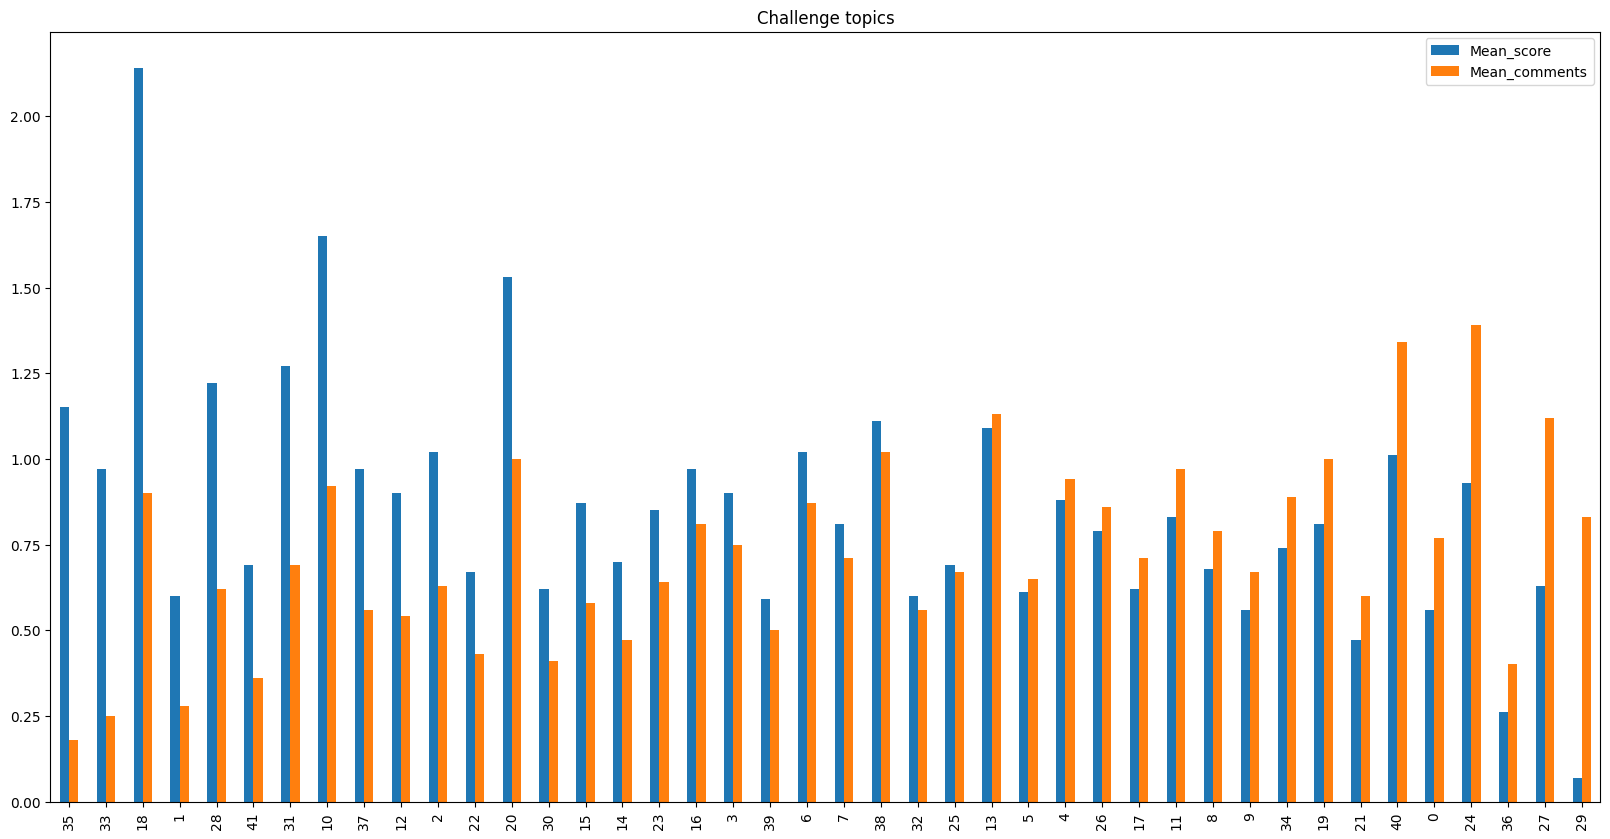

In [96]:
df_all = pd.read_json(os.path.join(path_dataset, 'all_topics.json'))
df_challenge = df_all.groupby('Challenge_topic').agg(Mean_score=('Challenge_score', 'mean'), Mean_comments=('Challenge_comment_count', 'mean'), Count = ('Challenge_topic', 'count')).reset_index().round(2)
df_challenge['Score_comment_ratio'] = (df_challenge['Mean_score'] / df_challenge['Mean_comments']).round(2)
df_challenge = df_challenge.sort_values(by='Score_comment_ratio', ascending=False)

df_challenge.set_index('Challenge_topic')
df_challenge[['Mean_score', 'Mean_comments']].plot(kind='bar', figsize=(20, 10), title='Challenge topics')